<a href="https://colab.research.google.com/github/ZARBOUBI-MOHAMED/CustomBottleneck-VGGNet_Tomato_Leaf_Diseases/blob/main/Models/GoogleNet/GoogleNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Connecte to driver**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!pwd

/content


# **Download the file.rar of the dataset to train the model**

In [ ]:
#  input_fil  ===>  output_folder
!unrar x "/content/gdrive/MyDrive/Colab Notebooks/Tomato_Leaf_Diseases/Dataset/Tomato_No_augmen.rar" "/content/"

Streaming output truncated to the last 5000 lines.
Extracting  /content/Tomato_No_augmen/Train/Yellow Leaf Curl Virus/image (3160).JPG      73%  OK 
Extracting  /content/Tomato_No_augmen/Train/Yellow Leaf Curl Virus/image (3161).JPG      73%  OK 
Extracting  /content/Tomato_No_augmen/Train/Yellow Leaf Curl Virus/image (3162).JPG      73%  OK 
Extracting  /content/Tomato_No_augmen/Train/Yellow Leaf Curl Virus/image (3163).JPG      73%  OK 
Extracting  /content/Tomato_No_augmen/Train/Yellow Leaf Curl Virus/image (3164).JPG      73%  OK 
Extracting  /content/Tomato_No_augmen/Train/Yellow Leaf Curl Virus/image (3165).JPG      73%  OK 
Extracting  /content/Tomato_No_augmen/Train/Yellow Leaf Curl Virus/image (3166).JPG      73%  OK 
Extracting  /content/Tomato_No_augmen/Train/Yellow Leaf Curl Virus/image (3167).JPG      73%  OK 
Extracting  /content/Tomato_No_augmen/Train/Yellow Leaf Curl Virus/image (3168).JPG      

# **############ GoogleNet ##################**

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 112, 112, 64)         9472      ['input_1[0][0]']             
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 56, 56, 64)           0         ['conv2d[0][0]']              
 D)                                                                                               
                                                                                                  
 conv2d_1 (Conv2D)           (None, 56, 56, 192)          110784    ['max_pooling2d[0][0]']   

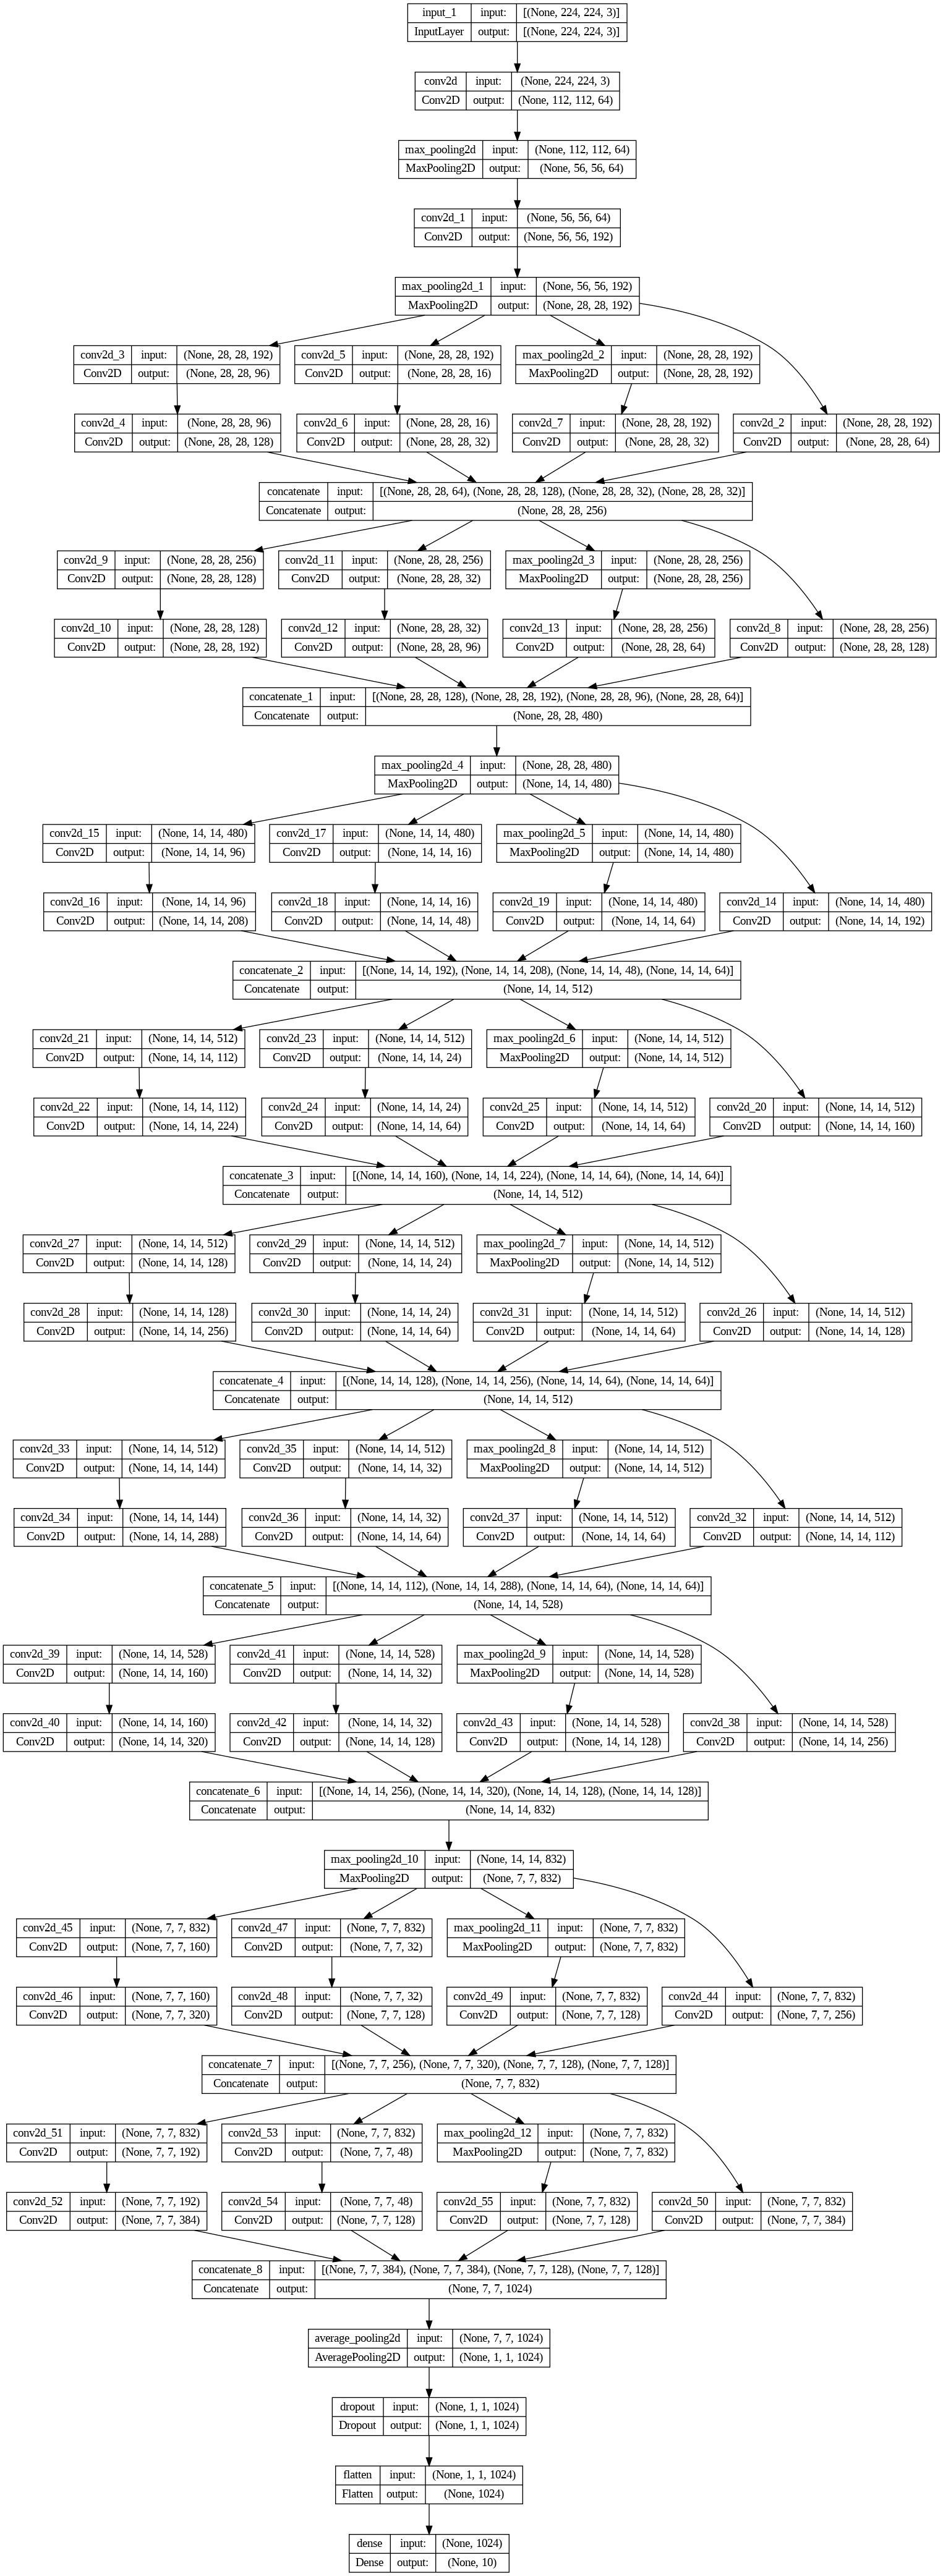

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dropout, Dense, Flatten, Input, concatenate
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import CSVLogger
from tensorflow.keras.utils import plot_model
import pandas as pd
import time

#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
custom_path = "GoogleNet/"
filename_1 = "GoogleNet.png"
#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

#************************************* input *************************************

# Parameters for images (size and scaling)
img_width, img_height = 224, 224

# Inception module function
def inception_module(x, filters_1x1, filters_3x3_reduce, filters_3x3, filters_5x5_reduce, filters_5x5, filters_pool_proj):
    conv_1x1 = Conv2D(filters_1x1, (1, 1), padding='same', activation='relu')(x)

    conv_3x3 = Conv2D(filters_3x3_reduce, (1, 1), padding='same', activation='relu')(x)
    conv_3x3 = Conv2D(filters_3x3, (3, 3), padding='same', activation='relu')(conv_3x3)

    conv_5x5 = Conv2D(filters_5x5_reduce, (1, 1), padding='same', activation='relu')(x)
    conv_5x5 = Conv2D(filters_5x5, (5, 5), padding='same', activation='relu')(conv_5x5)

    pool_proj = MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    pool_proj = Conv2D(filters_pool_proj, (1, 1), padding='same', activation='relu')(pool_proj)

    output = concatenate([conv_1x1, conv_3x3, conv_5x5, pool_proj], axis=3)
    return output

# Input layer
input_layer = Input(shape=(img_width, img_height, 3))

# Stem of the network
x = Conv2D(64, (7, 7), strides=(2, 2), padding='same', activation='relu')(input_layer)
x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
x = Conv2D(192, (3, 3), padding='same', activation='relu')(x)
x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

# Inception modules
x = inception_module(x, 64, 96, 128, 16, 32, 32)
x = inception_module(x, 128, 128, 192, 32, 96, 64)
x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
x = inception_module(x, 192, 96, 208, 16, 48, 64)
x = inception_module(x, 160, 112, 224, 24, 64, 64)
x = inception_module(x, 128, 128, 256, 24, 64, 64)
x = inception_module(x, 112, 144, 288, 32, 64, 64)
x = inception_module(x, 256, 160, 320, 32, 128, 128)
x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
x = inception_module(x, 256, 160, 320, 32, 128, 128)
x = inception_module(x, 384, 192, 384, 48, 128, 128)

# Output layers
x = AveragePooling2D((7, 7), padding='same')(x)
x = Dropout(0.4)(x)
x = Flatten()(x)
output_layer = Dense(10, activation='softmax')(x)  # 10 output classes

# Create the model
model = Model(input_layer, output_layer)

#*******************************************************************************
# Display a summary of the custom model
model.summary()
#*******************************************************************************
# Visualize the model
plot_model(model, to_file=f"/content/gdrive/MyDrive/Colab Notebooks/Tomato_Leaf_Diseases/Models/{custom_path}{filename_1}", show_shapes=True)


# **Experiment Configuration**

In [ ]:
# Define the learning rate

learning_rate = 0.001

# Compile the model by specifying the learning rate

optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

# Compile the model

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Define the paths of training and validation dataset
train_data_dir = '/content/Tomato_No_augmen/Train'
validation_data_dir = '/content/Tomato_No_augmen/Validation'

In [ ]:
# Use ImageDataGenerator only for pixel scaling
batch_size = 32
datagen = ImageDataGenerator(rescale=1.0 / 255.0)

train_generator = datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 12707 images belonging to 10 classes.
Found 3641 images belonging to 10 classes.


In [ ]:
#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
filename_2 = "Train/training_history.csv"
filename_3 = "Train/GoogleNet.h5"
#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

# Train the model
epochs = 100   # Number of training epochs *****************
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# Start the timer
start_time = time.time()
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# Train the model while collecting the training history
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=epochs)  # Add the CSVLogger callback

#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# Stop the timer
end_time = time.time()

# Calculate the training time
training_time = end_time - start_time
print(f"Training time: {training_time:.2f} seconds")
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

# Convert the history object to a DataFrame
history_df = pd.DataFrame(history.history)

# Save the history to a CSV file
history_df.to_csv('training_history.csv', index=False)

# Save the model after training if necessary
model.save('GoogleNet.h5')

# Save the history to a CSV file in Drive

history_df.to_csv(f"/content/gdrive/MyDrive/Colab Notebooks/Tomato_Leaf_Diseases/Models/{custom_path}{filename_2}", index=False)

# Save the model in Drive
model.save(f"/content/gdrive/MyDrive/Colab Notebooks/Tomato_Leaf_Diseases/Models/{custom_path}{filename_3}")



Epoch 1/100
397/397 [==============================] - 82s 139ms/step - loss: 1.8540 - accuracy: 0.3529 - val_loss: 1.4984 - val_accuracy: 0.4699
Epoch 2/100
397/397 [==============================] - 54s 137ms/step - loss: 1.3393 - accuracy: 0.5236 - val_loss: 1.0825 - val_accuracy: 0.6139
Epoch 3/100
397/397 [==============================] - 54s 137ms/step - loss: 1.0077 - accuracy: 0.6473 - val_loss: 0.7292 - val_accuracy: 0.7464
Epoch 4/100
397/397 [==============================] - 50s 126ms/step - loss: 0.7591 - accuracy: 0.7381 - val_loss: 0.6540 - val_accuracy: 0.7707
Epoch 5/100
397/397 [==============================] - 54s 136ms/step - loss: 0.5987 - accuracy: 0.7883 - val_loss: 0.5536 - val_accuracy: 0.8045
Epoch 6/100
397/397 [==============================] - 55s 138ms/step - loss: 0.5156 - accuracy: 0.8170 - val_loss: 0.5983 - val_accuracy: 0.8012
Epoch 7/100
397/397 [==============================] - 52s 130ms/step - loss: 0.4177 - accuracy: 0.8517 - val_loss: 0.3620 -

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import pandas as pd

# Convert the history object to a DataFrame
history_df = pd.DataFrame(history.history)

# Save the history to a CSV file
history_df.to_csv('training_history.csv', index=False)

# Save the model after training if necessary
model.save('GoogleNet.h5')

# Save the history to a CSV file in Drive

history_df.to_csv(f"/content/gdrive/MyDrive/Colab Notebooks/Tomato_Leaf_Diseases/Models/{custom_path}{filename_2}", index=False)

# Save the model in Drive
model.save(f"/content/gdrive/MyDrive/Colab Notebooks/Tomato_Leaf_Diseases/Models/{custom_path}{filename_3}")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# **Display and save each graph separately in EPS format**

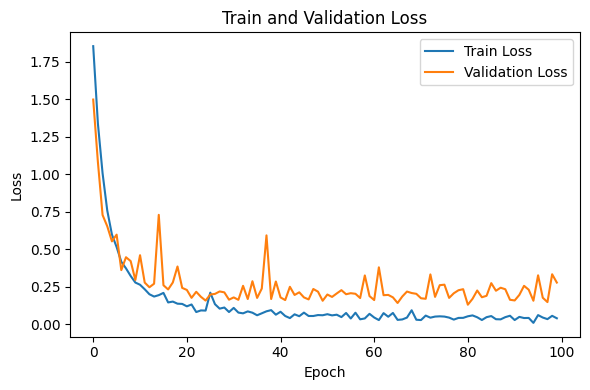

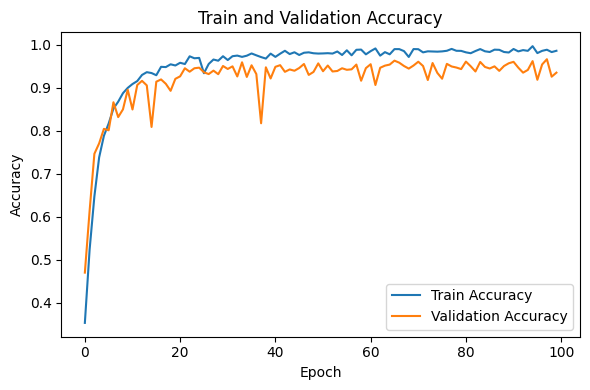

In [ ]:
#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
filename_4 = "Train/train_val_loss.eps"
filename_5 = "Train/train_val_accuracy.eps"
#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

# Display and save the loss graph
plt.figure(figsize=(6, 4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train and Validation Loss')
plt.tight_layout()
plt.savefig(f"/content/gdrive/MyDrive/Colab Notebooks/Tomato_Leaf_Diseases/Models/{custom_path}{filename_4}", format='eps', bbox_inches='tight')
plt.show()

# Display and save the accuracy graph
plt.figure(figsize=(6, 4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train and Validation Accuracy')
plt.tight_layout()
plt.savefig(f"/content/gdrive/MyDrive/Colab Notebooks/Tomato_Leaf_Diseases/Models/{custom_path}{filename_5}", format='eps', bbox_inches='tight')
plt.show()


# **Plot the training curves of loss and accuracy from the CSV file**

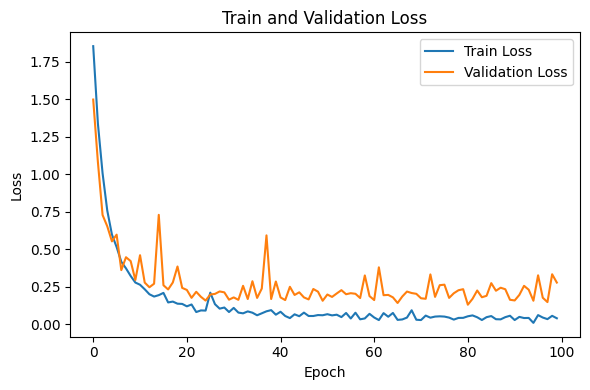

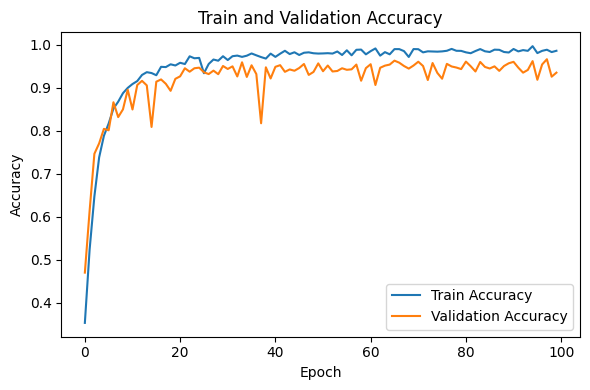

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt

#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
custom_path = "GoogleNet/"
#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
filename_6 = "Train/training_history.csv"
filename_7 = "Train/Train_val_loss_2.eps"
filename_8 = "Train/train_val_accuracy_2.eps"
#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

# Load training data from the CSV file
log_data = pd.read_csv(f"/content/gdrive/MyDrive/Colab Notebooks/Tomato_Leaf_Diseases/Models/{custom_path}{filename_6}")

# Plot the loss graph
plt.figure(figsize=(6, 4))
plt.plot(log_data['loss'], label='Train Loss')
plt.plot(log_data['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train and Validation Loss')
plt.tight_layout()
plt.savefig(f"/content/gdrive/MyDrive/Colab Notebooks/Tomato_Leaf_Diseases/Models/{custom_path}{filename_7}", format='eps', bbox_inches='tight')
plt.show()

# Plot the accuracy graph
plt.figure(figsize=(6, 4))
plt.plot(log_data['accuracy'], label='Train Accuracy')
plt.plot(log_data['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train and Validation Accuracy')
plt.tight_layout()
plt.savefig(f"/content/gdrive/MyDrive/Colab Notebooks/Tomato_Leaf_Diseases/Models/{custom_path}{filename_8}", format='eps', bbox_inches='tight')
plt.show()


# **Test Model**

In [ ]:
#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
custom_path = "GoogleNet/"
#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

Found 1812 images belonging to 10 classes.
57/57 [==============================] - 6s 99ms/step
Accuracy: 93.98%
Precision: 94.37%
Recall: 93.98%
F1 Score: 93.91%


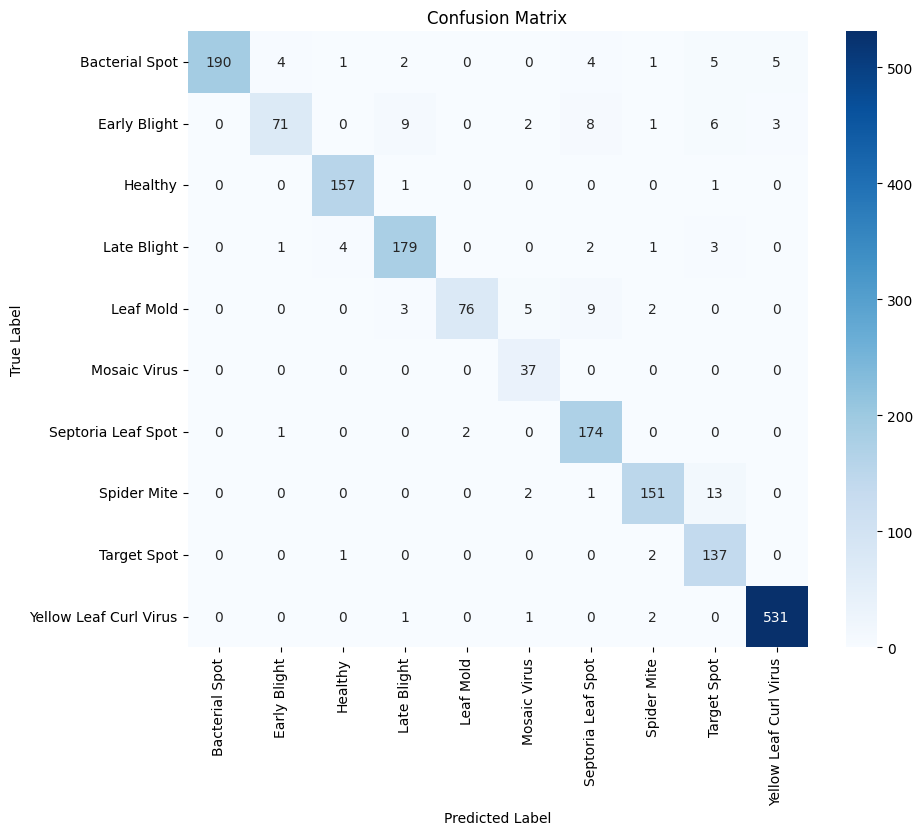

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
filename_9 = "Train/GoogleNet.h5"
filename_10 = "Train/confusion_matrix.eps"
#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

# Test directory

test_data_dir = '/content/Tomato_No_augmen/Test'

# Load the pre-trained model from the file
model = load_model(f"/content/gdrive/MyDrive/Colab Notebooks/Tomato_Leaf_Diseases/Models/{custom_path}{filename_9}")

# Parameters for the images (size and scaling)
img_width, img_height = 224, 224
batch_size = 32

# Create a data generator for scaling the test images
datagen = ImageDataGenerator(rescale=1.0 / 255.0)

# Use the model to make predictions on the test data
test_generator = datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False)  # Ensure the data remains in the correct order

# Model predictions on the test data
predictions = model.predict(test_generator, steps=(test_generator.samples + batch_size - 1) // batch_size)

# Get the true labels from the test data
true_labels = test_generator.classes

# Get the predicted classes
predicted_labels = np.argmax(predictions, axis=1)

# Compute the confusion matrix
confusion = confusion_matrix(true_labels, predicted_labels)

# Display the confusion matrix
class_names = list(test_generator.class_indices.keys())

# Create a figure with a specific size in inches
plt.figure(figsize=(10, 8))

sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')



# Compute the metrics
accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels, average='weighted')
recall = recall_score(true_labels, predicted_labels, average='weighted')
f1 = f1_score(true_labels, predicted_labels, average='weighted')

# Display the metrics
print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1 Score: {f1 * 100:.2f}%')

# Save the confusion matrix in EPS format
plt.savefig(f"/content/gdrive/MyDrive/Colab Notebooks/Tomato_Leaf_Diseases/Models/{custom_path}{filename_10}", format='eps', bbox_inches='tight')
plt.show()


# **Calculate the number of FLOPs (Floating Point Operations per Second)**

In [ ]:
#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
custom_path = "GoogleNet/"
filename_9 = "Train/GoogleNet.h5"
#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

In [ ]:
# Import required libraries
import tensorflow as tf
from tensorflow.keras.models import load_model

# Load the model
model = load_model(f"/content/gdrive/MyDrive/Colab Notebooks/Tomato_Leaf_Diseases/Models/{custom_path}{filename_9}")

# Create a concrete function
@tf.function
def model_fn(inputs):
    return model(inputs)

# Convert the model to a concrete function
input_shape = model.input_shape[1:]  # Exclude batch size
inputs = tf.TensorSpec([1, *input_shape], tf.float32)  # Batch size of 1
concrete_function = model_fn.get_concrete_function(inputs)

# Get the frozen graph
from tensorflow.python.framework.convert_to_constants import convert_variables_to_constants_v2
frozen_func = convert_variables_to_constants_v2(concrete_function)
graph_def = frozen_func.graph.as_graph_def()

# Calculate FLOPs using tf.compat.v1
tf.compat.v1.reset_default_graph()
with tf.compat.v1.Session() as sess:
    tf.compat.v1.import_graph_def(graph_def, name="")
    flops = tf.compat.v1.profiler.profile(
        sess.graph,
        options=tf.compat.v1.profiler.ProfileOptionBuilder.float_operation(),
    )

    # Display FLOPs in billions
    flops_in_billions = flops.total_float_ops / 1e9
    print(f"FLOPs: {flops_in_billions:.2f} Billion")

FLOPs: 3.15 Billion
